In [1]:
from imports import *
from agents import BetaAgent
from model import Model
from network_utils import *
from network_randomization import *
from network_generation import *
from simulation_functions import *

# Testing Generated

In [2]:
n_simulations = 10
G_default = barabasi_albert_directed(200,5)

num_cores = cpu_count()  # Get the number of available CPU cores
print(num_cores)

# Define a partial function to pass G_perceptron to generate_parameters_empir
# This ensures that generate_parameters_empir is called with the correct argument within the pool
# The 'partial' function allows you to create a new function with some of the arguments pre-filled.
from functools import partial
generate_params_with_G = partial(generate_parameters, G=G_default)

with Pool(num_cores) as pool:
    # Use tqdm to display a progress bar
    # Now, 'generate_params_with_G' is the function that will be executed by each worker.
    # Each worker will receive an index from 'range(n_simulations)' as its argument,
    # which is ignored in 'generate_params_with_G' but is required by the 'imap_unordered' function.
    param_dict = list(tqdm.tqdm(pool.imap_unordered(generate_params_with_G, range(n_simulations)), total=n_simulations))

8


100%|██████████| 10/10 [00:02<00:00,  3.45it/s]


In [3]:
print(len(param_dict))
param_dict[0]

10


{'randomized': True,
 'unique_id': 'ade08432cd634b95881106741f07c32e',
 'n_agents': 200,
 'network': <networkx.classes.digraph.DiGraph at 0x1153daa10>,
 'uncertainty': 0.0015969306477480222,
 'n_experiments': 4,
 'p_rewiring': 0.7472633003976409,
 'average_degree': 4.925,
 'degree_gini_coefficient': np.float64(0.39383248730964465),
 'approx_average_clustering_coefficient': 0.03152491269156204,
 'diameter': 201,
 'avg_path_length': 201,
 'degree_entropy': np.float64(2.3699695316018974)}

In [4]:
# Run simulations in parallel
with Pool(num_cores) as pool:
    simulation_results = list(tqdm.tqdm(pool.imap_unordered(run_simulation_wrapper, param_dict),
                                        total=len(param_dict), desc="Running simulations"))

# Convert results to a DataFrame
basic_results_df = pd.DataFrame(simulation_results)
display(basic_results_df)

Running simulations: 100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


,randomized,unique_id,n_agents,uncertainty,n_experiments,p_rewiring,average_degree,degree_gini_coefficient,approx_average_clustering_coefficient,diameter,avg_path_length,degree_entropy,share_of_correct_agents_at_convergence,convergence_step,init_agents_alphas_betas,degree_centrality_vector
0,True,c8a2f92308464b4a8f9378ffd38d46df,200,0.001010,15,0.945898,4.925,0.262381,0.022403,201,201,2.181373,0.640,25,"[[[303.09913548491744, 345.06022656647315], [8...","[0.12562814070351758, 0.09547738693467336, 0.0..."
1,True,fc39d937b9aa487a896e8fb118a4628f,200,0.000940,12,0.788955,4.925,0.369782,0.034279,201,201,2.304644,0.560,27,"[[[228.5974280855134, 218.65631834943642], [27...","[0.17587939698492464, 0.10552763819095477, 0.1..."
2,True,9661ea3427184fa4ade718c1b749e026,200,0.001124,11,0.257509,4.925,0.709162,0.140418,201,201,2.145472,0.655,29,"[[[2.3621511907944788, 1.8995954451553954], [1...","[0.5276381909547738, 0.33668341708542715, 0.47..."
3,True,357d3c336f9e42e99968e4dede3132fa,200,0.001208,9,0.600013,4.925,0.485386,0.056101,201,201,2.259149,0.700,30,"[[[236.0796831815248, 244.47086566413017], [32...","[0.32663316582914576, 0.18592964824120603, 0.2..."
4,True,a520e251fa644b0381580be38a85bfce,200,0.001088,6,0.378617,4.925,0.643548,0.108884,201,201,2.177638,0.130,31,"[[[378.27849341609374, 379.28094216615204], [7...","[0.4371859296482412, 0.31155778894472363, 0.40..."
5,True,ade08432cd634b95881106741f07c32e,200,0.001597,4,0.747263,4.925,0.393832,0.031525,201,201,2.369970,0.540,52,"[[[473.76693391102407, 453.62429509285437], [2...","[0.18090452261306533, 0.10552763819095477, 0.1..."
6,True,6dd79532d8c449288618a29aafae0537,200,0.000872,10,0.872655,4.925,0.301670,0.029880,201,201,2.237090,0.645,29,"[[[242.76525903603664, 291.5232537914412], [31...","[0.12562814070351758, 0.08542713567839195, 0.1..."
7,True,82dc5834c56b46d1996488c4f72948f5,200,0.001871,1,0.455965,4.925,0.573112,0.080591,201,201,2.260515,0.465,81,"[[[82.33416949956872, 105.55977605542637], [10...","[0.3919597989949749, 0.2562814070351759, 0.296..."
8,True,9849029a087548028820973564fb0975,200,0.001113,2,0.016724,4.925,0.877051,0.240748,201,201,1.794150,0.245,86,"[[[1.572786443093125, 2.3657853279613335], [83...","[0.6331658291457286, 0.4170854271356784, 0.572..."
9,True,cceb7c4944014a6aa988cd3162af0675,200,0.001350,2,0.795082,4.925,0.371751,0.030569,201,201,2.300137,0.575,61,"[[[144.16114463399572, 128.35539848651342], [5...","[0.21105527638190955, 0.15075376884422112, 0.1..."


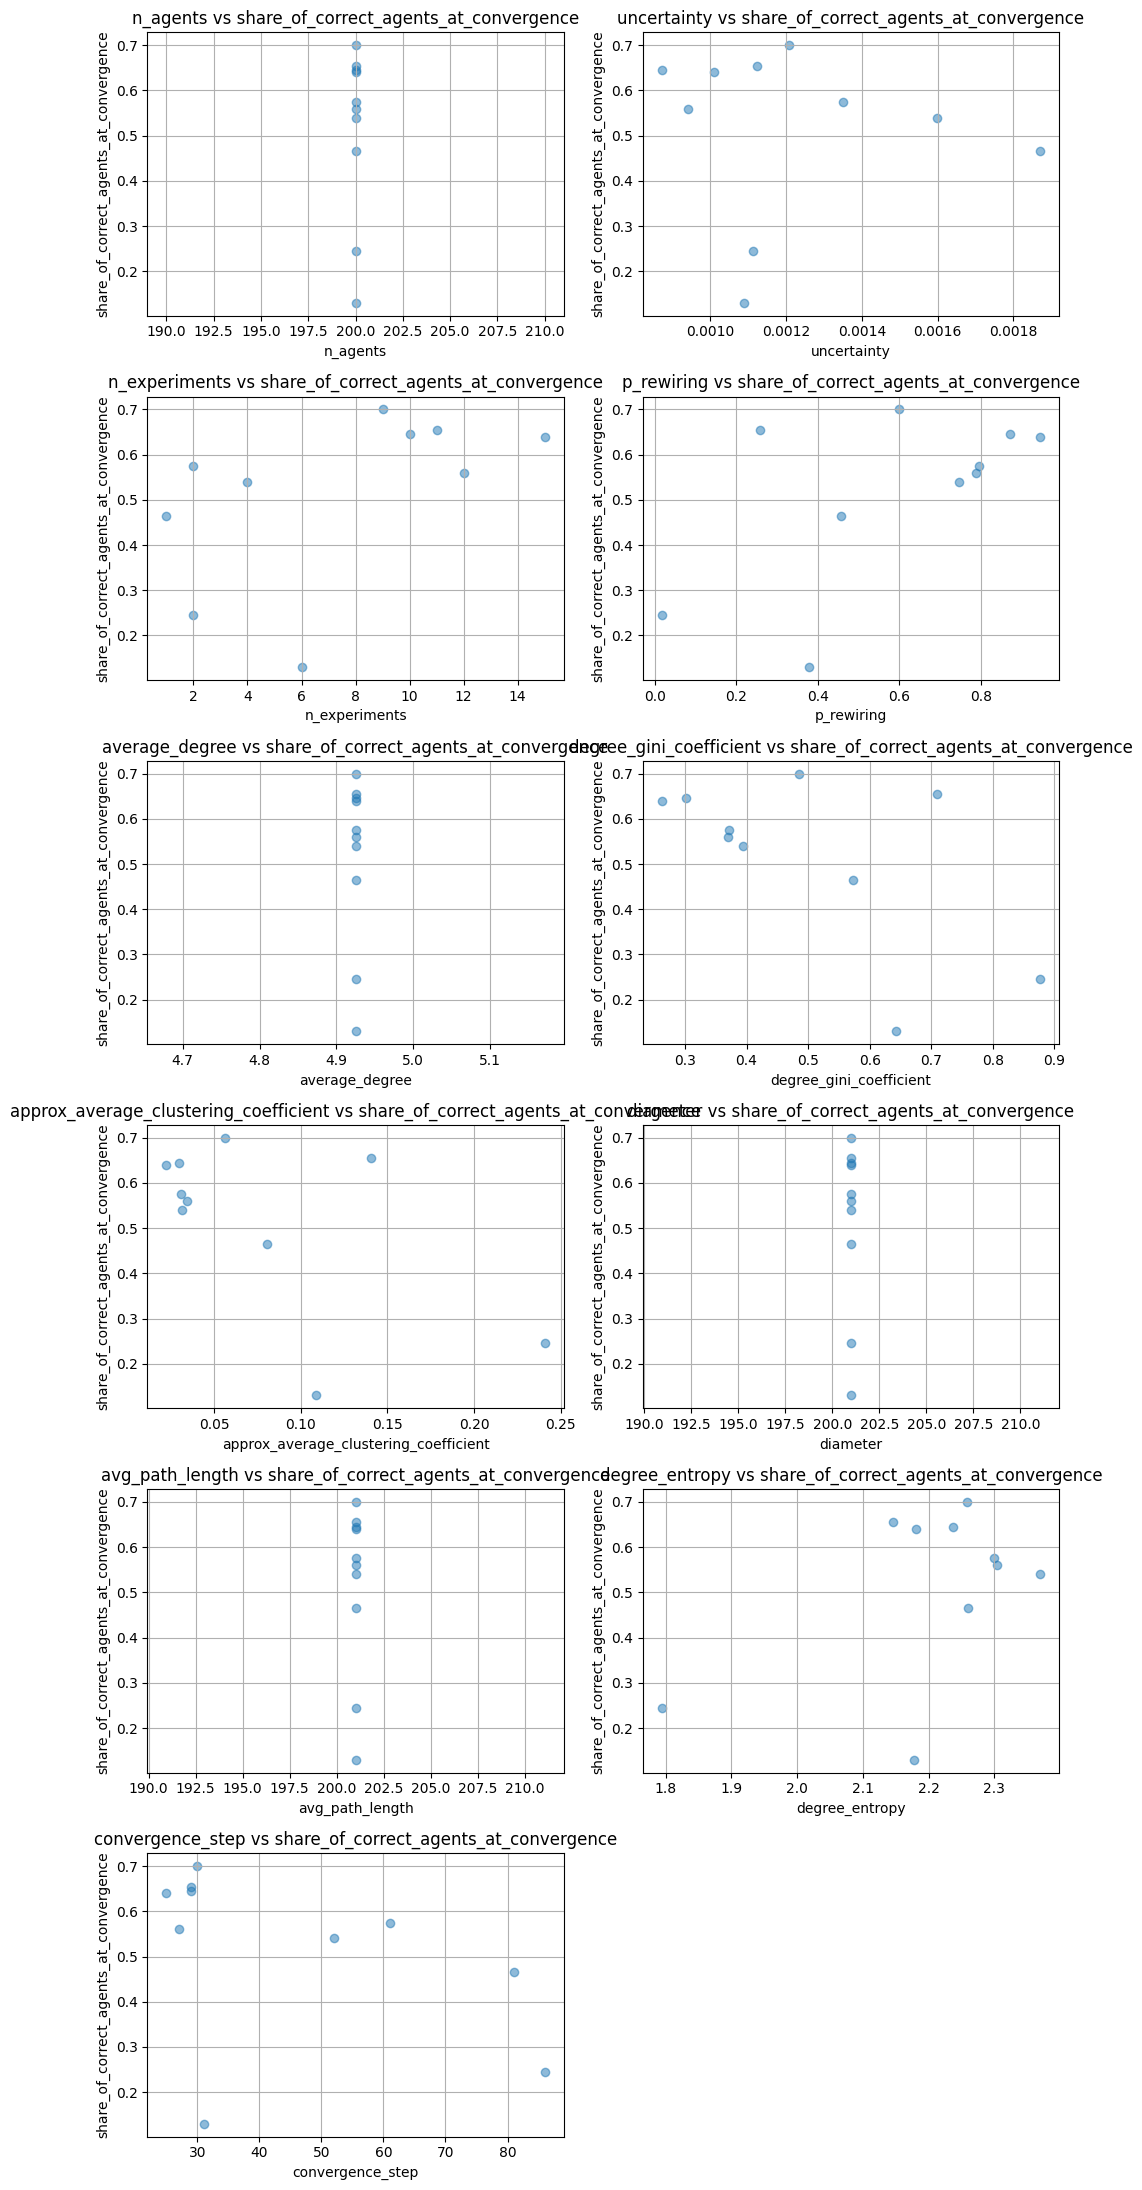

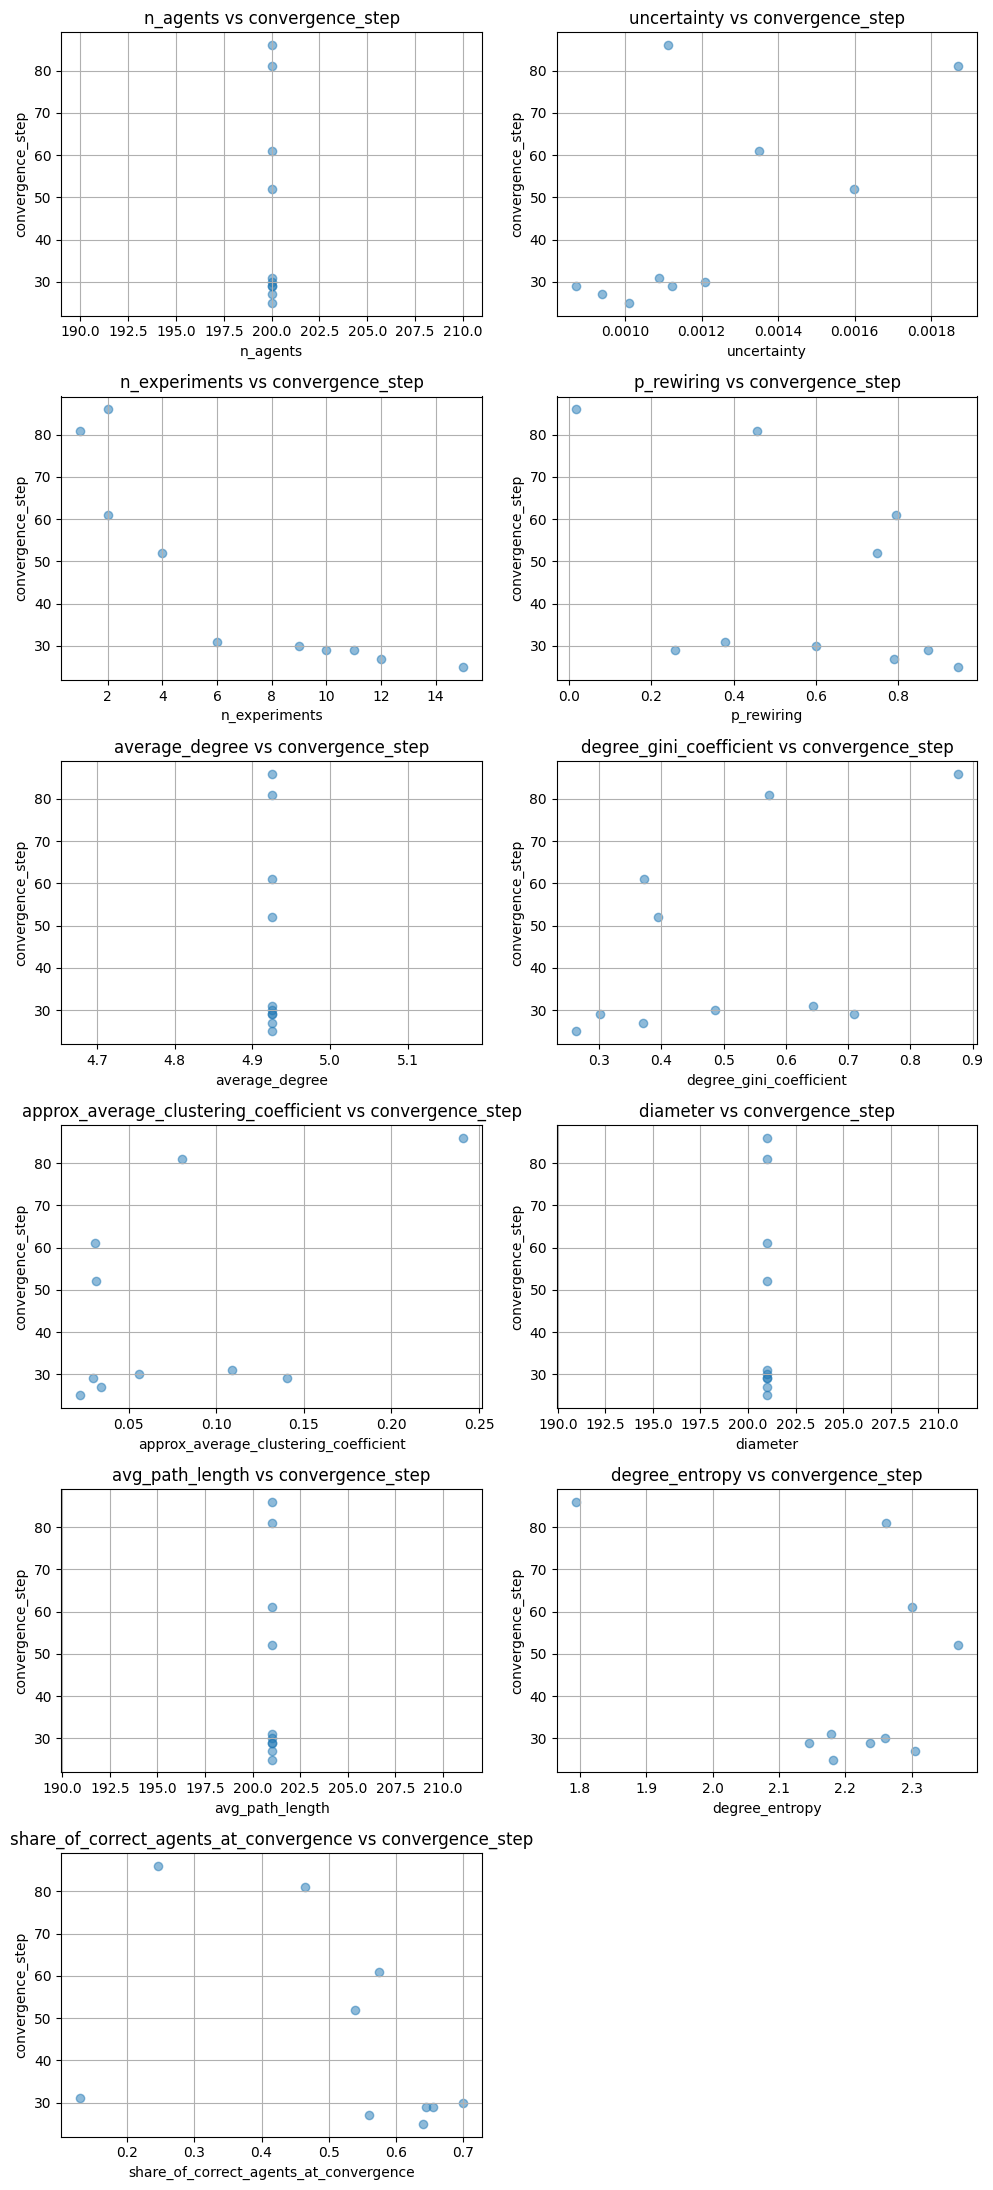

In [5]:
basic_results_df.to_csv("basic_results_df.csv", index=False)  # Saves without index
scatter_plot(basic_results_df)
scatter_plot(basic_results_df, target_variable="convergence_step")

# Testing Empirical

In [6]:
with open('./empirical_networks/perc_pruned_lcc.pkl', 'rb') as f:
  G_perceptron = pickle.load(f)

n_agents = G_perceptron.number_of_nodes()
print(n_agents)

# Create a mapping from node names to indexes
mapping = {node: index for index, node in enumerate(G_perceptron.nodes())}

# Relabel the nodes in the graph
G_perceptron_indexed = nx.relabel_nodes(G_perceptron, mapping)
G_default = G_perceptron_indexed


n_simulations = 10

num_cores = cpu_count()  # Get the number of available CPU cores
print(num_cores)

# Define a partial function to pass G_perceptron to generate_parameters_empir
# This ensures that generate_parameters_empir is called with the correct argument within the pool
# The 'partial' function allows you to create a new function with some of the arguments pre-filled.
from functools import partial
generate_params_with_G = partial(generate_parameters, G=G_default)

with Pool(num_cores) as pool:
    # Use tqdm to display a progress bar
    # Now, 'generate_params_with_G' is the function that will be executed by each worker.
    # Each worker will receive an index from 'range(n_simulations)' as its argument,
    # which is ignored in 'generate_params_with_G' but is required by the 'imap_unordered' function.
    param_dict = list(tqdm.tqdm(pool.imap_unordered(generate_params_with_G, range(n_simulations)), total=n_simulations))
    
param_dict[0]

138
8


100%|██████████| 10/10 [00:03<00:00,  3.07it/s]


{'randomized': True,
 'unique_id': '03c8b7d43bdb4a9bb85cfc18e4cb2d5a',
 'n_agents': 138,
 'network': <networkx.classes.digraph.DiGraph at 0x1153793c0>,
 'uncertainty': 0.0018502696849356107,
 'n_experiments': 5,
 'p_rewiring': 0.38704612756763135,
 'average_degree': 2.152173913043478,
 'degree_gini_coefficient': np.float64(0.5938857170741229),
 'approx_average_clustering_coefficient': 0.057758222808479934,
 'diameter': 139,
 'avg_path_length': 139,
 'degree_entropy': np.float64(1.8148165974965935)}

Running simulations: 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


,randomized,unique_id,n_agents,uncertainty,n_experiments,p_rewiring,average_degree,degree_gini_coefficient,approx_average_clustering_coefficient,diameter,avg_path_length,degree_entropy,share_of_correct_agents_at_convergence,convergence_step,init_agents_alphas_betas,degree_centrality_vector
0,True,f490ec72673747e982ed81fcd8c0ef14,138,0.000839,12,0.115590,2.152174,0.737154,0.095517,139,139,1.716684,0.456522,29,"[[[1.1746392588850014, 2.21822319400447], [179...","[0.029197080291970802, 0.0072992700729927005, ..."
1,True,87ab2500dfc5436aac3c53cc14ab910a,138,0.001796,10,0.122246,2.152174,0.751452,0.094753,139,139,1.715342,0.405797,33,"[[[1.2679027804922467, 2.0958188546140617], [1...","[0.021897810218978103, 0.014598540145985401, 0..."
2,True,eb7e670714934cdc8bd080ef796cec7f,138,0.002342,13,0.481790,2.152174,0.545674,0.034517,139,139,1.765758,0.644928,38,"[[[430.5417392615859, 467.8641083702038], [41....","[0.021897810218978103, 0.029197080291970802, 0..."
3,True,52812d4c95b44c20ba77a5d9aa822333,138,0.001637,12,0.398625,2.152174,0.600327,0.024378,139,139,1.791166,0.456522,39,"[[[337.59943125057305, 411.4980283925798], [97...","[0.029197080291970802, 0.0072992700729927005, ..."
4,True,90eccdf9900e46efb8413f44fb2fff98,138,0.002084,9,0.662277,2.152174,0.473698,0.019183,139,139,1.750646,0.528986,49,"[[[221.48691327277282, 226.7791040123334], [0....","[0.043795620437956206, 0.014598540145985401, 0..."
5,True,03c8b7d43bdb4a9bb85cfc18e4cb2d5a,138,0.001850,5,0.387046,2.152174,0.593886,0.057758,139,139,1.814817,0.521739,49,"[[[220.46824807795753, 261.9784171307519], [2....","[0.029197080291970802, 0.014598540145985401, 0..."
6,True,6ad8da582ec84fc9aca385d416fc13b8,138,0.001738,2,0.049710,2.152174,0.776924,0.090726,139,139,1.644149,0.434783,51,"[[[0.09553586034487038, 1.7585332393089002], [...","[0.021897810218978103, 0.0072992700729927005, ..."
7,True,ce666eaef4594c8299250efbb5967cbd,138,0.000737,5,0.798309,2.152174,0.420558,0.019553,139,139,1.732475,0.673913,53,"[[[74.30800184668189, 87.92768893140543], [442...","[0.043795620437956206, 0.0364963503649635, 0.0..."
8,True,b47cde34aecf46e2a8939db9bd410cf5,138,0.001871,15,0.934635,2.152174,0.380984,0.011367,139,139,1.754057,0.565217,33,"[[[172.97839134638653, 160.89346313022614], [3...","[0.014598540145985401, 0.029197080291970802, 0..."
9,True,04a8c17a836a486abd5e5172527eabdc,138,0.001110,10,0.130365,2.152174,0.736373,0.068745,139,139,1.734002,0.565217,32,"[[[0.20872239600029285, 1.475320439294308], [1...","[0.021897810218978103, 0.0072992700729927005, ..."


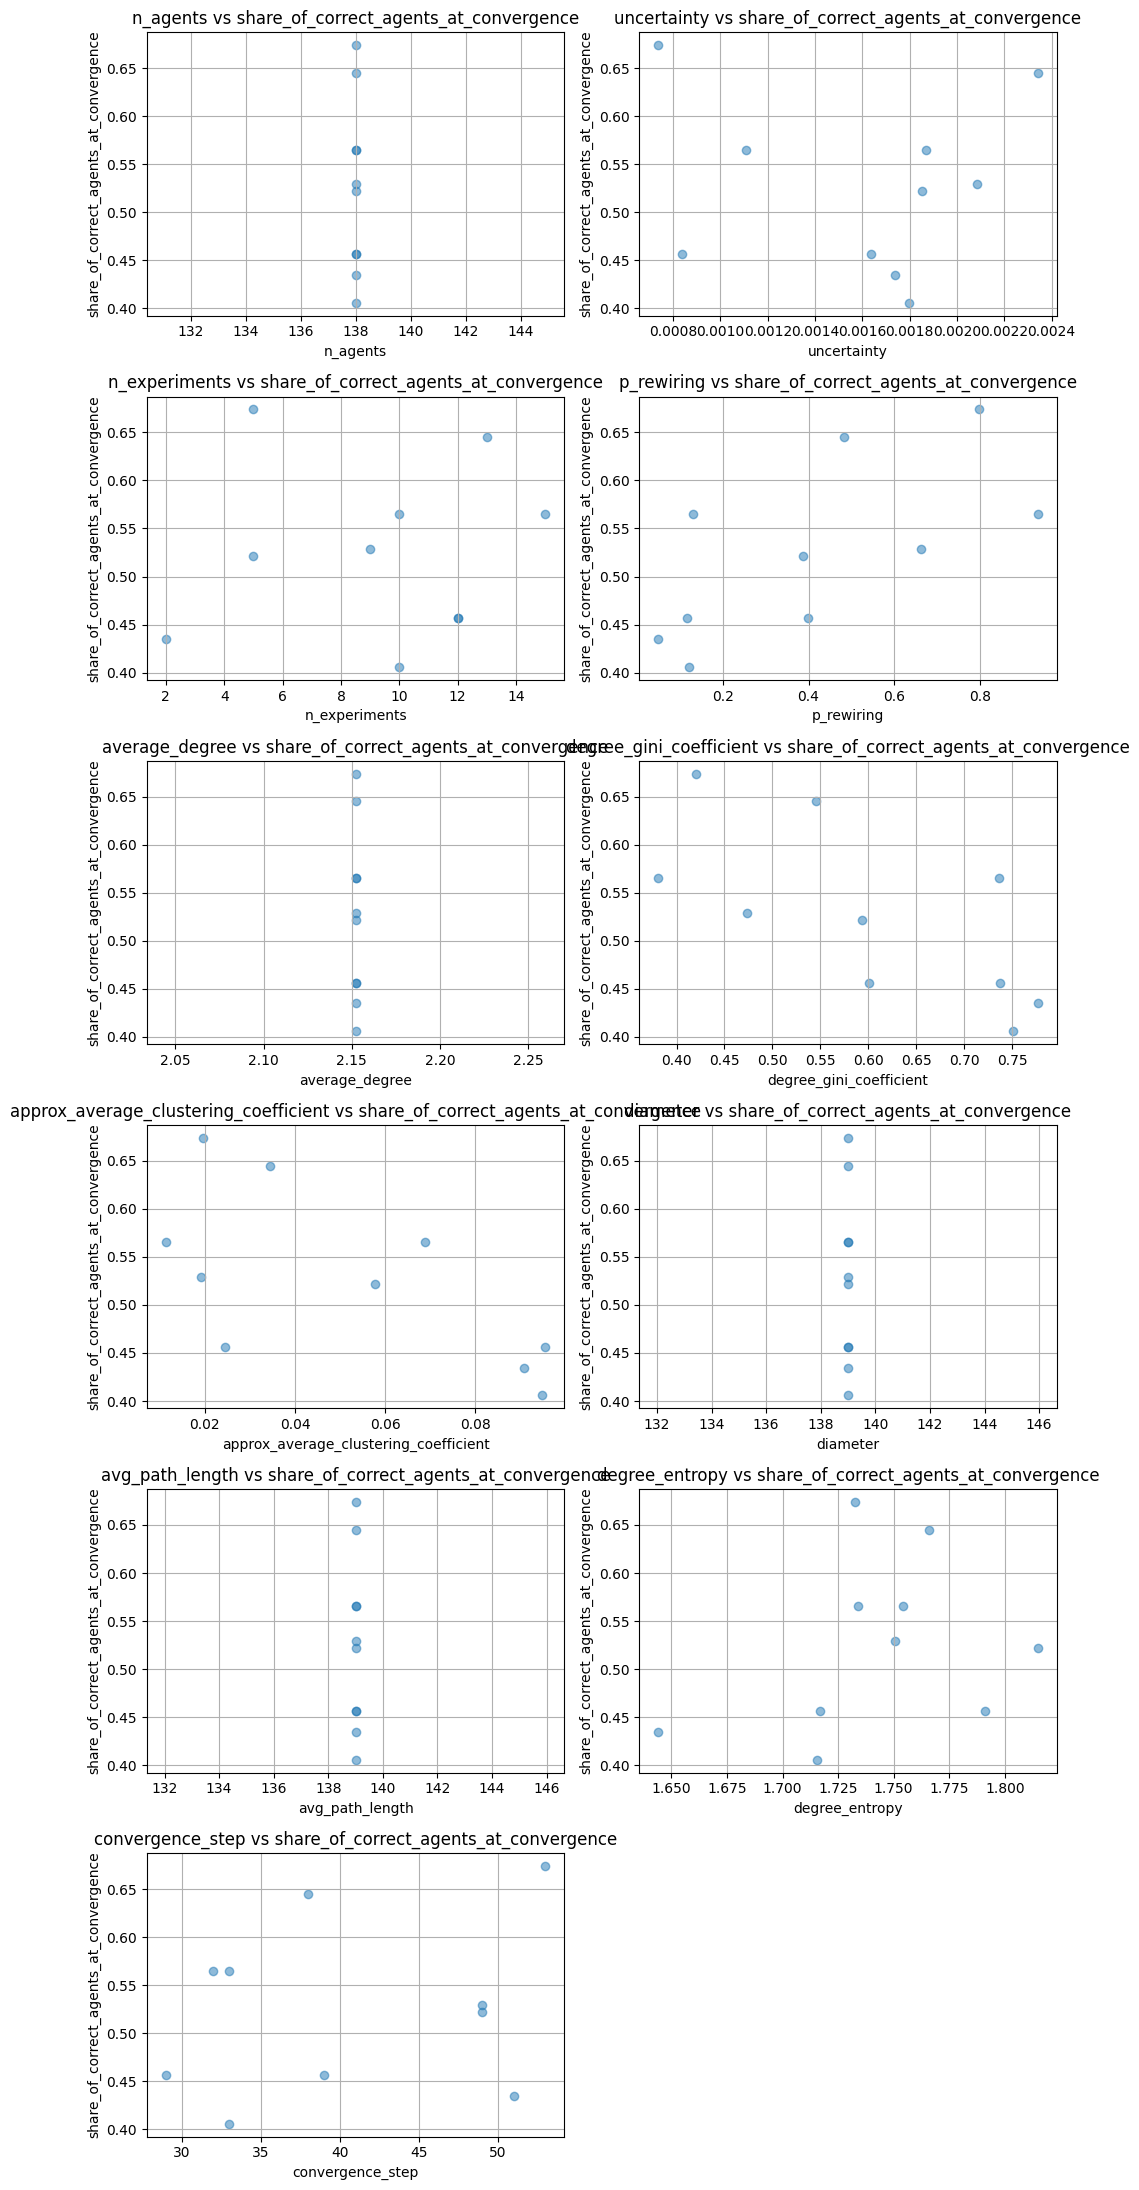

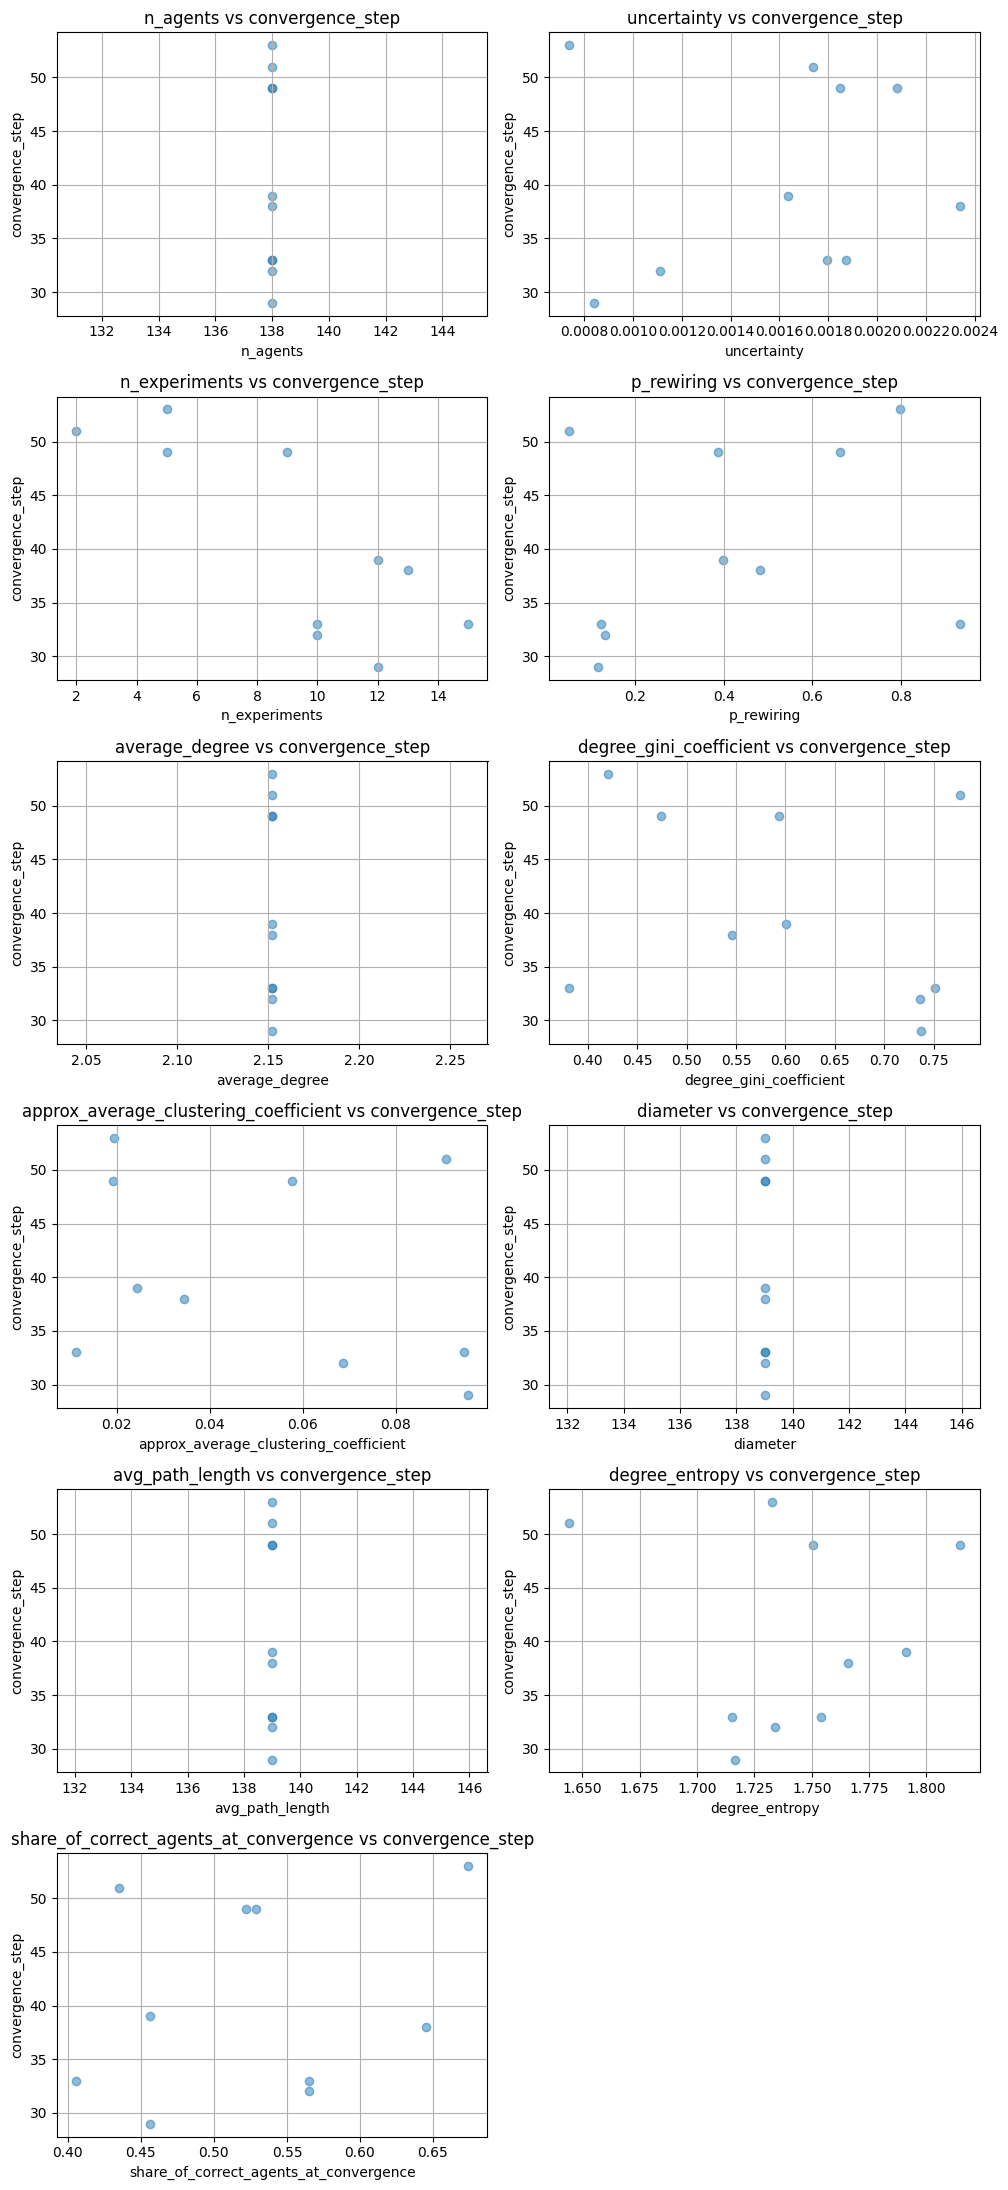

In [7]:
# Run simulations in parallel
with Pool(num_cores) as pool:
    simulation_results = list(tqdm.tqdm(pool.imap_unordered(run_simulation_wrapper, param_dict),
                                        total=len(param_dict), desc="Running simulations"))

# Convert results to a DataFrame
basic_results_df = pd.DataFrame(simulation_results)
display(basic_results_df)
scatter_plot(basic_results_df)
scatter_plot(basic_results_df, target_variable="convergence_step")